In [0]:
#Sentiment Analysis using GBM

In [1]:
!apt-get install default-jre
!java -version 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.
openjdk version "11.0.6" 2020-01-14
OpenJDK Runtime Environment (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1)
OpenJDK 64-Bit Server VM (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1, mixed mode, sharing)


In [2]:
!pip install h2o

     |████████████████████████████████| 129.6MB 51kB/s 
  Created wheel for h2o: filename=h2o-3.30.0.2-py2.py3-none-any.whl size=129672980 sha256=744dc86b25de237cd299ac8bfed9d08cadd38938b7b233374210b9249f4978e0
  Stored in directory: /root/.cache/pip/wheels/35/f0/d4/2090fb81ef10fd3dedffd1386a8a4d79b882e8e978fbee4e14
Successfully built h2o


In [0]:
import tensorflow_datasets as tdfs
import h2o
import numpy as np

In [4]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.6" 2020-01-14; OpenJDK Runtime Environment (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1); OpenJDK 64-Bit Server VM (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmppy5_tx0e
  JVM stdout: /tmp/tmppy5_tx0e/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmppy5_tx0e/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.2
H2O_cluster_version_age:,2 days
H2O_cluster_name:,H2O_from_python_unknownUser_4erd48
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [5]:
df,info = tdfs.load('amazon_us_reviews/Personal_Care_Appliances_v1_00',with_info= True, batch_size=-1)
train_df = df['train']

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Shuffling and writing examples to /root/tensorflow_datasets/amazon_us_reviews/Personal_Care_Appliances_v1_00/0.1.0.incompleteW1MA95/amazon_us_reviews-train.tfrecord


ERROR:absl:Statistics generation doesn't work for nested structures yet



Dataset amazon_us_reviews downloaded and prepared to /root/tensorflow_datasets/amazon_us_reviews/Personal_Care_Appliances_v1_00/0.1.0. Subsequent calls will reuse this data.


In [6]:
info

tfds.core.DatasetInfo(
    name='amazon_us_reviews',
    version=0.1.0,
    description='Amazon Customer Reviews (a.k.a. Product Reviews) is one of Amazons iconic products. In a period of over two decades since the first review in 1995, millions of Amazon customers have contributed over a hundred million reviews to express opinions and describe their experiences regarding products on the Amazon.com website. This makes Amazon Customer Reviews a rich source of information for academic researchers in the fields of Natural Language Processing (NLP), Information Retrieval (IR), and Machine Learning (ML), amongst others. Accordingly, we are releasing this data to further research in multiple disciplines related to understanding customer product experiences. Specifically, this dataset was constructed to represent a sample of customer evaluations and opinions, variation in the perception of a product across geographical regions, and promotional intent or bias in reviews.

Over 130+ million cus

In [0]:
dataset = tdfs.as_numpy(train_df)

In [8]:
dataset

{'data': {'customer_id': array([b'13986323', b'50574716', b'50593972', ..., b'40719682',
         b'35596948', b'29430209'], dtype=object),
  'helpful_votes': array([0, 3, 0, ..., 0, 0, 0], dtype=int32),
  'marketplace': array([b'US', b'US', b'US', ..., b'US', b'US', b'US'], dtype=object),
  'product_category': array([b'Personal_Care_Appliances', b'Personal_Care_Appliances',
         b'Personal_Care_Appliances', ..., b'Personal_Care_Appliances',
         b'Personal_Care_Appliances', b'Personal_Care_Appliances'],
        dtype=object),
  'product_id': array([b'B00847JQZ6', b'B00N5HD340', b'B0077L1X24', ..., b'B000UZ8X2W',
         b'B000NURPPK', b'B001EY5GNW'], dtype=object),
  'product_parent': array([b'997683625', b'955577225', b'120764066', ..., b'96066145',
         b'58591097', b'986877728'], dtype=object),
  'product_title': array([b'SE - Reading Glass - Spring Loaded Hinges, 4.0x - RTS62400',
         b'Straight Razor',
         b'Philips Sonicare Flexcare & Healthy White Plastic

In [0]:
helpful_votes = dataset['data']['helpful_votes']
review_headline = dataset['data']['review_headline']
review_body = dataset['data']['review_body']
ratings = dataset['data']['star_rating']

In [10]:
data = h2o.H2OFrame(np.hstack((helpful_votes[:,None],review_headline[:,None],review_body[:,None],ratings[:,None])),column_names=['votes','headlines','reviews','ratings'],column_types=['numeric','string','string','numeric'])

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [11]:
data

votes,headlines,reviews,ratings
0,b'These glasses are an excellent value. The fit is good and they are ...',"b""These glasses are an excellent value. The fit is good and they are very comfortable. Because of my legal blindness, there aren't a lot of options to try to see better, but I believe these help with my other visual aids, and because they are reasonably priced I can have more than one pair available.""",4
3,b'A fantastic way to cheaply try straight razor shaving.',"b""Always wanted to try straight razor shaving (as a DE safety razor user), and this was a cheap way for me to determine I was not into it.<br /><br />Because the blades are disposable and always sharp, I could put a new one in and reasonably rely upon that fact that cuts were probably due to my technique and not the blade.<br /><br />It's very hard to do straight razor shaving on yourself because the ANGLE is difficult to control without switching hands. Being very right-handed, I really couldn't do that. I bet I could shave someone else's face with it though.<br /><br />An immediate upside? Using a DE safety razor (slant edged even) seems SUPER safe now! I'm increased my speed with the DE due to that confidence, and I'd been using it for years now.""",5
0,b'Great for travel',"b'I usually either throw my toothbrush in a plastic bag with spare head so this product is very convenient for keeping all the parts apart, dry and undamaged, and i now keep it in my travel bag all the time ready to go.'",4
0,b'Five Stars',b'Top quality.',5
1,b'*Product sent not as shown',"b'Today I received 1 Fl. Oz, Natures Balance AlkaMAX alkaline booster liquid unflavored (formally TriMedica) a glass brown bottle with eye dropper.<br />Supplement Facts; Serving Size: 10 Drops (Approx. 0.5 mL). Servings per Container: Approx. 60<br />Amount Per Serving % Daily Value<br />Magnesium (as Magnesium Chloride) 40 mg 10%<br />Chloride (as Magnesium Chloride) 64 mg 2%<br />Other Ingredients: Deionized water and trace mineral complex.<br />Directions: Add 10 drops to 8 oz. of water or other beverage daily as needed or as directed by your health care practitioner. Store in a cool, dry place.<br /><br />I have not used product as of yet with changed ingredients of original/as shown in AlkaMax alkaline support white squeeze bottle.<br />but had to rate to post...heck this new may be better for all I know.'",3
6,b'Seems to work well!',"b'I recently picked this unit up at Bed and Bath where it was $99.00. With a 20% coupon the price was $80 (so comparison shop!) It\'s easy to use and seems to work well. I agree with other reviewers about the noise level (loud like a tea kettle boiling), but I use this unit in the living room area so sleeping is not an issue. Having the 2 separate water reservoirs to fill is much easier, weight-wise, as I previously had another humidifier which had one large water reservoir and it was very heavy when full. The unit comes apart quite easily for cleaning and since frequent cleaning is recommended (I usually do it 1x per week, not daily) this is a definite plus. Additionally, one only needs to use vinegar to clean the inside reservoir, which is a lot cheaper than having to buy some kind of \\\\""special\\\\"" cleaning solution. My one complaint is that it doesn\'t, but should, have an automatic shut off when both tanks are empty.I have to remember to turn the unit off when I leave the house. My previous humidifiers all had this auto turn off; seems like every humidifier should.'",4
8,b'deep heat?????',"b'Not sure what previous reviewer was talking about. The product uses ULTRASOUND waves for pain relief NOT heat. After repeated use, the pain in my knee and shoulder was feeling great. I think you should re-read the description and reconsider your opinion. Great product sold by a great company.'",5
2,b'Thermometer for a toddler',"b""The shippers were great....willing to consider speedier shipping options, but in the end the standard shipping arrived quickly enough. Th

In [0]:
data['target'] = (data['ratings']>=4).ifelse('1','0')

In [13]:
data['target']

target
1
1
1
1
0
1
1
1
1
1


In [14]:
data.shape[0]

85981

In [15]:
data['target'].table()

target,Count
0,23427
1,62554


In [17]:
data.describe()

Rows:85981
Cols:5




,votes,headlines,reviews,ratings,target
type,int,string,string,int,enum
mins,0.0,NaN,NaN,1.0,
mean,3.3494841883672,NaN,NaN,3.977401984159291,
maxs,2785.0,NaN,NaN,5.0,
sigma,19.483167220712946,NaN,NaN,1.433130291971473,
zeros,44555,0,0,0,
missing,0,0,0,0,0
0,0.0,b'These glasses are an excellent value. The fit is good and they are ...',"b""These glasses are an excellent value. The fit is good and they are very comfortable. Because of my legal blindness, there aren't a lot of options to try to see better, but I believe these help with my other visual aids, and because they are reasonably priced I can have more than one pair available.""",4.0,1
1,3.0,b'A fantastic way to cheaply try straight razor shaving.',"b""Always wanted to try straight razor shaving (as a DE safety razor user), and this was a cheap way for me to determine I was not into it.<br /><br />Because the blades are disposable and always sharp, I could put a new one in and reasonably rely upon that fact that cuts were probably due to my technique and not the blade.<br /><br />It's very hard to do straight razor shaving on yourself because the ANGLE is difficult to control without switching hands. Being very right-handed, I really couldn't do that. I bet I could shave someone else's face with it though.<br /><br />An immediate upside? Using a DE safety razor (slant edged even) seems SUPER safe now! I'm increased my speed with the DE due to that confidence, and I'd been using it for years now.""",5.0,1
2,0.0,b'Great for travel',"b'I usually either throw my toothbrush in a plastic bag with spare head so this product is very convenient for keeping all the parts apart, dry and undamaged, and i now keep it in my travel bag all the time ready to go.'",4.0,1


In [18]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
def tokenize(line):
  tokenized = line.tokenize('\\W+')
  tokenized = tokenized.tolower()
  tokenized = tokenized[(tokenized.nchar()>= 2) | (tokenized.isna()),:]
  tokenized_filter = tokenized[(tokenized.isna())| (~tokenized.isin(stop_words)),:]
  return tokenized_filter

In [0]:
word_reviews = tokenize(data['reviews'])

In [0]:
word_headings = tokenize(data['headlines'])

In [24]:
word_reviews.head()

C1
glasses
excellent
value
fit
good
comfortable
legal
blindness
lot
options


In [25]:
word_headings.head()

C1
glasses
excellent
value
fit
good
""
fantastic
way
cheaply
try


In [0]:
from h2o.estimators.word2vec import H2OWord2vecEstimator
from h2o.estimators import H2OGradientBoostingEstimator, H2OXGBoostEstimator

In [27]:
vec_model = H2OWord2vecEstimator(vec_size = 120, model_id = 'w2v_amazon.model')
vec_model.train(training_frame = word_reviews)

word2vec Model Build progress: |██████████████████████████████████████████| 100%


In [28]:
h2o.save_model(vec_model,path ='./')

'/content/w2v_amazon.model'

In [0]:
vec_model = h2o.load_model('w2v_amazon.model')

In [30]:
vec_model.find_synonyms('glasses',count = 5)

OrderedDict([('sunglasses', 0.8881736397743225),
             ('readers', 0.8370149731636047),
             ('bifocals', 0.7719966769218445),
             ('lenses', 0.7693980932235718),
             ('bifocal', 0.7606756687164307)])

In [34]:
vec_model.find_synonyms('perfumnes',count = 5)

OrderedDict()

In [33]:
vec_model.find_synonyms('toothpaste',count = 5)

OrderedDict([('listerine', 0.7155876159667969),
             ('mouthwash', 0.7061328887939453),
             ('plax', 0.674338698387146),
             ('whitening', 0.6589301228523254),
             ('mentadent', 0.6580336093902588)])

In [0]:
review_vec = vec_model.transform(word_reviews, aggregate_method='AVERAGE')

In [36]:
review_vec.shape

(85981, 120)

In [37]:
review_vec.head()

C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C40,C41,C42,C43,C44,C45,C46,C47,C48,C49,C50,C51,C52,C53,C54,C55,C56,C57,C58,C59,C60,C61,C62,C63,C64,C65,C66,C67,C68,C69,C70,C71,C72,C73,C74,C75,C76,C77,C78,C79,C80,C81,C82,C83,C84,C85,C86,C87,C88,C89,C90,C91,C92,C93,C94,C95,C96,C97,C98,C99,C100,C101,C102,C103,C104,C105,C106,C107,C108,C109,C110,C111,C112,C113,C114,C115,C116,C117,C118,C119,C120
-0.0281383,0.0451605,0.0208805,0.0364022,0.0490283,0.0597845,0.086836,-0.0205995,0.0228449,0.105774,0.148021,0.104677,0.00195168,-0.0839992,-0.028422,0.0261864,0.0219118,-0.0224802,0.0537292,0.039628,-0.0893521,0.0422975,0.143983,0.00826768,-0.0403056,0.0784658,0.00423847,0.0164394,-0.118442,0.0871048,-0.0755437,0.155734,0.230034,-0.00990373,-0.0453658,-0.0623023,0.0599429,-0.0555877,-0.140618,0.01435,0.0634803,0.0221044,0.00178899,0.109879,0.0783917,-0.116054,-0.0148566,0.123911,-0.0241501,-0.0284834,0.0719345,-0.0178627,-0.0570021,0.0920691,-0.0542657,0.182695,0.0540829,0.0297654,-0.0280399,-0.0220062,0.0284479,-0.0604486,0.139157,0.0389688,-0.0864332,-0.00194377,-0.0109303,-0.117638,-0.0604054,-0.102923,-0.0524479,-0.0442748,0.158725,-0.0375727,-0.164285,-0.0509256,0.0756197,0.0378284,0.080267,0.0606812,-0.0508439,-0.0139939,-0.130689,0.0905521,0.140889,0.0934242,0.00119441,0.0707536,0.0451454,-0.0453052,-0.100579,-0.0265068,-0.0153192,0.0493424,-0.0725744,0.159301,0.105778,-0.0575126,-0.253128,-0.0315594,-0.0628594,-0.0116016,-0.00699913,-0.0794256,0.0765776,-0.130006,0.0307449,-0.0485227,0.0936148,-0.077482,-0.0247745,-0.188623,0.0489733,0.0490692,-0.103469,0.253566,-0.0840114,0.1322,-0.121225,-0.0620176
0.0433192,-0.0840268,0.0425826,-0.000292823,0.00559941,-0.124929,-0.00813934,-0.0624668,0.105256,0.140612,-0.0262967,0.013893,-0.0958595,-0.149584,-0.0956728,0.0149765,-0.100034,0.0232381,-0.0519553,0.0117788,-0.150605,-0.00724392,-0.0146965,0.123472,-0.0148585,0.0899243,-0.0842476,0.0778576,-0.209886,-0.0253203,-0.161526,0.114094,-0.0191719,-0.0799578,0.026333,-0.0472668,0.0309505,-0.142703,-0.0498395,0.114788,0.0590307,-0.0449061,-0.0120751,0.0971442,-0.106114,-0.0629573,0.0653218,0.0451325,0.00542171,0.0526864,0.150377,-0.0489438,-0.067726,0.178047,-0.00484355,0.075601,0.0184764,-0.0498107,-0.0478897,-0.119254,-0.0788942,-0.0493377,0.0927758,0.0239685,-0.00932156,-0.0603101,0.063082,-0.141753,-0.0382907,0.00498611,0.0236715,-0.0740937,0.232219,-0.0214917,-0.0817281,-0.0402355,0.0643114,-0.0412106,0.116513,0.0439791,-0.156161,0.00343228,-0.007348,0.138099,0.0357591,-0.0289391,0.0923529,0.0741014,0.149985,0.0268088,-0.0117311,-0.0499424,0.0411574,0.145084,-0.126042,0.0475984,0.187601,-0.0306477,-0.0323729,0.0475829,0.0138147,-0.0863087,0.0111424,-0.153721,0.00450265,-0.113574,-0.00221152,-0.0819239,0.0856897,-0.0992356,0.0557527,-0.118828,0.0318579,-0.0126614,-0.118974,0.101386,-0.054774,0.041871,-0.202018,-0.126616
0.0344487,0.110007,0.0861735,-0.0376675,-0.0826734,-0.0629142,0.157702,0.0516198,0.00753716,0.00155863,0.0541585,0.053212,0.0362179,0.0482439,0.00251221,0.109569,-0.00071505,0.10421,0.144443,0.0597009,-0.139015,-0.0423092,-0.0262226,0.0955599,0.0142984,0.00955585,-0.0153332,0.180859,-0.0765834,0.0882115,-0.188053,0.00408752,0.0722267,-0.0312545,-0.0376121,-0.0461079,0.0812354,0.00591186,0.121651,0.119304,0.121672,-0.0715815,-0.0388746,0.0846652,-0.0088995,-0.097112,0.0667445,0.0886653,-0.0311949,-0.0339122,0.0994114,0.121622,0.00600424,0.088188,-0.00837777,0.0581892,-0.0296497,-0.071109,-0.0493678,-0.0817493,-0.0197798,-0.134645,0.158339,-0.125463,0.0420071,-0.212747,0.0596774,-0.112956,-0.196398,0.0254909,-0.00512949,0.0865611,0.248209,0.0305199,-0.0549061,-0.0186852,-0.0170033,-0.0233586,0.0477204,-0.0124354,-0.00548817,-0.170578,-0.0728541,0.143101,0.109862,0.0939289,-0.0980536,0.0339828,0.152759,0.0010172,0.0766303,-0.123185,0.0282937,0.0945281,-0.0225884,0.000355505,0.0192144,0.0924216,-0.0479161,-0.0385058,-0.00939356,-0

In [0]:
data_ext = data.cbind(review_vec)

In [0]:
headline_vec = vec_model.transform(word_headings, aggregate_method='AVERAGE')
headline_vec.names = ['headline_' + s for s in headline_vec.names]

In [44]:
headline_vec.shape

(85981, 120)

In [45]:
headline_vec.head()

headline_C1,headline_C2,headline_C3,headline_C4,headline_C5,headline_C6,headline_C7,headline_C8,headline_C9,headline_C10,headline_C11,headline_C12,headline_C13,headline_C14,headline_C15,headline_C16,headline_C17,headline_C18,headline_C19,headline_C20,headline_C21,headline_C22,headline_C23,headline_C24,headline_C25,headline_C26,headline_C27,headline_C28,headline_C29,headline_C30,headline_C31,headline_C32,headline_C33,headline_C34,headline_C35,headline_C36,headline_C37,headline_C38,headline_C39,headline_C40,headline_C41,headline_C42,headline_C43,headline_C44,headline_C45,headline_C46,headline_C47,headline_C48,headline_C49,headline_C50,headline_C51,headline_C52,headline_C53,headline_C54,headline_C55,headline_C56,headline_C57,headline_C58,headline_C59,headline_C60,headline_C61,headline_C62,headline_C63,headline_C64,headline_C65,headline_C66,headline_C67,headline_C68,headline_C69,headline_C70,headline_C71,headline_C72,headline_C73,headline_C74,headline_C75,headline_C76,headline_C77,headline_C78,headline_C79,headline_C80,headline_C81,headline_C82,headline_C83,headline_C84,headline_C85,headline_C86,headline_C87,headline_C88,headline_C89,headline_C90,headline_C91,headline_C92,headline_C93,headline_C94,headline_C95,headline_C96,headline_C97,headline_C98,headline_C99,headline_C100,headline_C101,headline_C102,headline_C103,headline_C104,headline_C105,headline_C106,headline_C107,headline_C108,headline_C109,headline_C110,headline_C111,headline_C112,headline_C113,headline_C114,headline_C115,headline_C116,headline_C117,headline_C118,headline_C119,headline_C120
0.0167663,0.0881088,0.111646,-0.0138981,0.154785,0.00923273,0.150713,0.073704,0.0595506,0.098139,0.160629,0.141856,0.0430556,0.1206,-0.0104009,-0.0508928,0.099596,0.0246462,0.0818179,-0.0720243,-0.00496578,-0.0259296,0.245674,-0.0847367,-0.113406,0.111383,0.0570566,0.0729151,-0.240214,0.114176,-0.199124,0.245643,0.259764,0.0599958,-0.00820469,-0.0820662,-0.0788216,-0.0483936,-0.280738,0.0228901,0.0363569,-0.0960519,0.0321904,0.258716,0.118458,-0.276433,-0.149877,0.039462,0.0167982,-0.0086158,0.0721662,-0.0685812,0.165516,0.120818,-0.118754,0.271874,0.163167,-0.115543,-0.0439408,0.0422503,-0.00889166,-0.0574289,0.21757,0.0731451,-0.142796,-0.13098,0.0224685,-0.0648514,0.0721488,-0.221539,-0.0732108,0.00269813,0.275357,-0.0325674,-0.0418642,-0.0245192,0.00873421,0.0848084,0.0861872,0.16978,-0.0753107,-0.0420052,-0.1794,0.189948,0.167713,0.0905051,-0.0650456,0.171882,-0.0260678,-0.0599921,-0.114264,0.0388735,-0.00548821,0.0408349,-0.0713809,0.241354,0.0536725,-0.04727,-0.183559,-0.0614663,-0.0192838,-0.0176944,0.0788246,-0.0570179,0.262824,-0.249551,-0.00255683,-0.217247,0.141975,-0.0432307,-0.0935973,-0.170606,-0.0401705,0.0169646,-0.0456447,0.123534,-0.0514049,0.116387,-0.0857338,-0.0736334
0.0649395,-0.0657293,0.113735,-0.00803743,-0.0374132,-0.0836401,0.12788,0.0482955,0.125796,0.179572,0.0905048,-0.0796498,-0.0515725,-0.176556,-0.101979,-0.0600458,-0.00939516,0.0784705,-0.0729509,-0.0115156,-0.27681,-0.201764,-0.0769149,0.146217,0.0115752,0.0723127,-0.101176,0.0853413,-0.205427,-0.10697,-0.246169,0.096733,0.0923295,-0.0515423,0.0990973,-0.0476268,0.0529002,-0.292375,-0.0698126,0.0430496,0.0548981,-0.125123,-0.0445572,0.183838,-0.191803,-0.113339,-0.0336056,0.141244,-0.0277923,0.0498601,0.101638,-0.153838,-0.0558707,0.229572,-0.0306826,-0.0919603,0.124459,-0.125255,-0.0240612,-0.109863,-0.0583818,-0.0741707,0.0745107,0.0229306,0.0637089,-0.113114,0.0174251,-0.134052,-0.0978362,0.0603094,0.079886,-0.144606,0.307759,0.10239,-0.113752,-0.0363983,0.105025,-0.0514303,0.0563328,0.121196,-0.122017,-0.0588448,0.022086,0.148775,0.0245279,0.000852151,-0.0120437,0.0898042,0.222571,-0.0154381,0.0339385,-0.108664,-0.0177979,0.220305,-0.117877,0.00777352,0.122141,-0.104649,0.0112748,0.0281187,-0.0845959,-0.124184,0.0269022,-0.135383,0.0351611,-0.130415,-0.0158209,-0.025496,0.0809825,-0.142759,0.149223,-0.124816,0.0411221,-0.00596335,-0.0856953,0.0636514,0.00538526,0.0141371,-0.23845,-0.122459
-0.11

In [0]:
data_final = data_ext.cbind(headline_vec)

In [0]:
train_data, valid_data = data_final.split_frame(ratios=[0.8])

In [48]:
train_data.shape

(68649, 245)

In [49]:
valid_data.shape

(17332, 245)

In [50]:
print(train_data['target'].table())
print(valid_data['target'].table())

target,Count
0,18741
1,49908


target,Count
0,4686
1,12646


Buliding Model


In [0]:
#Base model
gbm_basemodel = H2OGradientBoostingEstimator(stopping_metric = 'AUC', stopping_tolerance = 0.001,stopping_rounds = 5, score_tree_interval = 10)

In [53]:
gbm_basemodel.train(x = review_vec.names, y = 'target', training_frame=train_data, validation_frame = valid_data)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [54]:
print('Basemodel AUC :' + str(round(gbm_basemodel.auc(valid = True),3)))

Basemodel AUC :0.878


In [55]:
gbm_basemodel.confusion_matrix(valid = True)


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.507596474922298: 


,,0,1,Error,Rate
0,0,2408.0,2278.0,0.4861,(2278.0/4686.0)
1,1,682.0,11964.0,0.0539,(682.0/12646.0)
2,Total,3090.0,14242.0,0.1708,(2960.0/17332.0)


Adding balance class to balance the target variable


In [56]:
gbm_basemodel_balanced = H2OGradientBoostingEstimator(stopping_metric = 'AUC', stopping_tolerance = 0.001,stopping_rounds = 5, score_tree_interval = 10)
gbm_basemodel_balanced.train(x = review_vec.names, y = 'target', training_frame=train_data, validation_frame = valid_data)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [57]:
print('Basemodel_balanced AUC :' + str(round(gbm_basemodel_balanced.auc(valid = True),3)))

Basemodel_balanced AUC :0.878


In [58]:
gbm_basemodel_balanced.confusion_matrix(valid = True)


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.507596474922298: 


,,0,1,Error,Rate
0,0,2408.0,2278.0,0.4861,(2278.0/4686.0)
1,1,682.0,11964.0,0.0539,(682.0/12646.0)
2,Total,3090.0,14242.0,0.1708,(2960.0/17332.0)


Adding votes and headlines 


In [60]:
gbm_rvh = H2OGradientBoostingEstimator(stopping_metric = 'AUC', stopping_tolerance = 0.001,stopping_rounds = 5, score_tree_interval = 10)
gbm_rvh.train(x =['votes'] + review_vec.names, y = 'target', training_frame=train_data, validation_frame = valid_data)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [62]:
print('gbm_rvh AUC :' + str(round(gbm_rvh.auc(valid = True),3)))

Basemodel_rvh AUC :0.877


In [63]:
gbm_rvh.confusion_matrix(valid=True)


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4793484210001646: 


,,0,1,Error,Rate
0,0,2259.0,2427.0,0.5179,(2427.0/4686.0)
1,1,545.0,12101.0,0.0431,(545.0/12646.0)
2,Total,2804.0,14528.0,0.1715,(2972.0/17332.0)


In [64]:
gbm_all_cols = H2OGradientBoostingEstimator(stopping_metric = 'AUC', stopping_tolerance = 0.001,stopping_rounds = 5, score_tree_interval = 10)
gbm_all_cols.train(x =['votes'] +headline_vec.names + review_vec.names, y = 'target', training_frame=train_data, validation_frame = valid_data)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [66]:
print('all_columns AUC :' + str(round(gbm_all_cols.auc(valid = True),3)))

 AUC :0.924


In [67]:
gbm_all_cols.confusion_matrix(valid=True)


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5141929781528712: 


,,0,1,Error,Rate
0,0,3016.0,1670.0,0.3564,(1670.0/4686.0)
1,1,587.0,12059.0,0.0464,(587.0/12646.0)
2,Total,3603.0,13729.0,0.1302,(2257.0/17332.0)


In [68]:
gbm_wo_votes = H2OGradientBoostingEstimator(stopping_metric = 'AUC', stopping_tolerance = 0.001,stopping_rounds = 5, score_tree_interval = 10)
gbm_wo_votes.train(x =headline_vec.names + review_vec.names, y = 'target', training_frame=train_data, validation_frame = valid_data)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [69]:
print('AUC excluding votes column :' + str(round(gbm_wo_votes.auc(valid = True),3)))

AUC excluding votes column :0.924


In [70]:
gbm_wo_votes.score_history()

,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-05-01 11:00:29,0.014 sec,0.0,0.445500,0.586217,0.500000,0.727003,1.000000,0.272997,0.444157,0.583641,0.500000,0.729633,1.000000,0.270367
1,,2020-05-01 11:00:39,9.738 sec,10.0,0.363910,0.426213,0.894429,0.954370,1.373055,0.154918,0.364061,0.426634,0.889312,0.952520,1.370552,0.158147
2,,2020-05-01 11:00:49,19.521 sec,20.0,0.333517,0.367215,0.912941,0.962983,1.375511,0.139405,0.336316,0.371727,0.905495,0.959980,1.370552,0.144588
3,,2020-05-01 11:00:59,29.390 sec,30.0,0.317128,0.334590,0.923708,0.967810,1.375511,0.129208,0.322611,0.343092,0.914118,0.964069,1.370552,0.139107
4,,2020-05-01 11:01:10,40.885 sec,40.0,0.306213,0.312914,0.931211,0.971120,1.375511,0.121895,0.314318,0.325310,0.919975,0.966754,1.370552,0.132818
5,,2020-05-01 11:01:21,51.173 sec,50.0,0.298066,0.297182,0.937115,0.973745,1.375511,0.115879,0.309041,0.313837,0.923722,0.968450,1.370552,0.130395


In [71]:
gbm_model = H2OGradientBoostingEstimator(ntrees = 100, learn_rate = 0.1, max_depth = 6, stopping_metric = 'AUC', stopping_tolerance = 0.001,stopping_rounds = 5, score_tree_interval = 10)
gbm_model.train(x =headline_vec.names + review_vec.names, y = 'target', training_frame=train_data, validation_frame = valid_data)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [74]:
print('AUC:' + str(round(gbm_model.auc(valid = True),3)))

AUC:0.937


In [76]:
gbm_model.confusion_matrix(valid= True)


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5022445782698665: 


,,0,1,Error,Rate
0,0,3262.0,1424.0,0.3039,(1424.0/4686.0)
1,1,625.0,12021.0,0.0494,(625.0/12646.0)
2,Total,3887.0,13445.0,0.1182,(2049.0/17332.0)


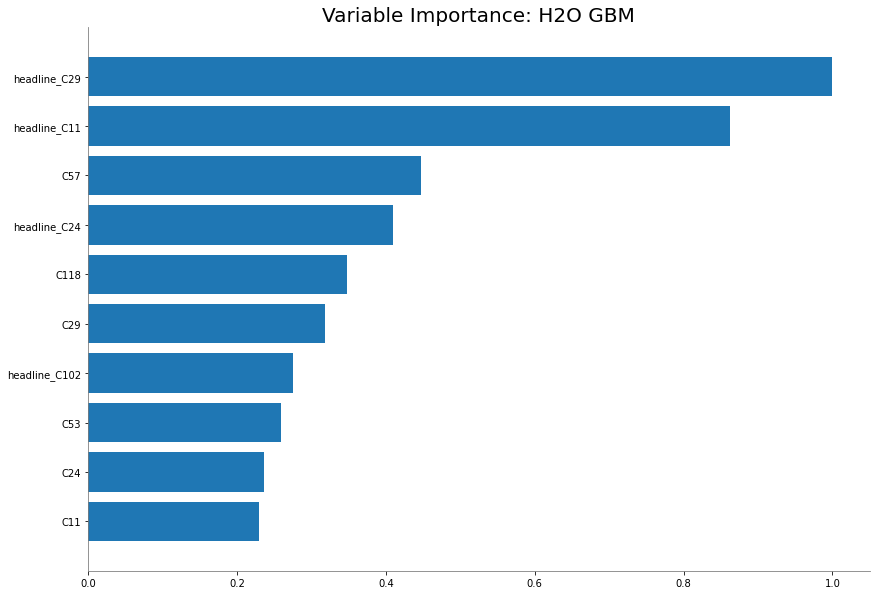

In [77]:
gbm_model.varimp_plot()

Hyperparameter tuning


In [0]:
ntrees_options = [100,200,500,1000]
max_depth_options = [5,6,7,8]
learn_rate_options = [0.01, 0.05, 0.1, 0.2]

In [0]:
hyper_parameters = {'ntrees': ntrees_options, 'max_depth': max_depth_options, 'learn_rate': learn_rate_options}
search_criteria = {'strategy':'RandomDiscrete','max_models':4}

In [0]:
from h2o.grid.grid_search import H2OGridSearch
grid_search = H2OGridSearch(H2OGradientBoostingEstimator, hyper_params = hyper_parameters, search_criteria = search_criteria)

In [93]:
grid_search.train(x =headline_vec.names+review_vec.names, y = 'target', training_frame=train_data, validation_frame = valid_data)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [94]:
print(grid_search.get_grid(sort_by= 'auc', decreasing= True))

     ...                 auc
0    ...  0.9441004779075828
1    ...  0.9411859156414579
2    ...  0.9369902939555872
3    ...  0.9106036626643822

[4 rows x 6 columns]



In [95]:
grid_search.models[0]

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  Grid_GBM_py_384_sid_82c8_model_python_1588323961238_89_model_1


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,500.0,500.0,721269.0,7.0,7.0,7.0,71.0,128.0,110.252




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.018551008583525787
RMSE: 0.13620208729504032
LogLoss: 0.08943472835967435
Mean Per-Class Error: 0.015278860662447213
AUC: 0.9984602788067134
AUCPR: 0.9993765861051718
Gini: 0.9969205576134268

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5571009193361358: 


,,0,1,Error,Rate
0,0,18182.0,559.0,0.0298,(559.0/18741.0)
1,1,307.0,49601.0,0.0062,(307.0/49908.0)
2,Total,18489.0,50160.0,0.0126,(866.0/68649.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.557101,0.991346,202.0
1,max f2,0.490953,0.993693,215.0
2,max f0point5,0.675165,0.992488,172.0
3,max accuracy,0.557101,0.987385,202.0
4,max precision,0.998843,1.000000,0.0
5,max recall,0.052679,1.000000,365.0
6,max specificity,0.998843,1.000000,0.0
7,max absolute_mcc,0.557101,0.968127,202.0
8,max min_per_class_accuracy,0.659903,0.984612,176.0
9,max mean_per_class_accuracy,0.671406,0.984721,173.0



Gains/Lift Table: Avg response rate: 72.70 %, avg score: 72.70 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010066,0.998986,1.375511,1.375511,1.000000,0.999157,1.000000,0.999157,0.013845,0.013845,37.551094,37.551094
1,,2,0.020000,0.998808,1.375511,1.375511,1.000000,0.998871,1.000000,0.999015,0.013665,0.027511,37.551094,37.551094
2,,3,0.030008,0.998610,1.375511,1.375511,1.000000,0.998715,1.000000,0.998915,0.013765,0.041276,37.551094,37.551094
3,,4,0.040001,0.998432,1.375511,1.375511,1.000000,0.998515,1.000000,0.998815,0.013745,0.055021,37.551094,37.551094
4,,5,0.050008,0.998260,1.375511,1.375511,1.000000,0.998354,1.000000,0.998723,0.013765,0.068787,37.551094,37.551094
5,,6,0.100001,0.996877,1.375511,1.375511,1.000000,0.997616,1.000000,0.998169,0.068767,0.137553,37.551094,37.551094
6,,7,0.150009,0.995028,1.375511,1.375511,1.000000,0.995981,1.000000,0.997440,0.068787,0.206340,37.551094,37.551094
7,,8,0.200003,0.992606,1.375511,1.375511,1.000000,0.993874,1.000000,0.996549,0.068767,0.275106,37.551094,37.551094
8,,9,0.300004,0.985696,1.375311,1.375444,0.999854,0.989412,0.999951,0.994170,0.137533,0.412639,37.531057,37.544415
9,,10,0.400006,0.974146,1.374509,1.375210,0.999272,0.980400,0.999782,0.990727,0.137453,0.550092,37.450911,37.521039




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.08038058981031387
RMSE: 0.28351470827862507
LogLoss: 0.2609476098888711
Mean Per-Class Error: 0.13213026523698712
AUC: 0.9441004779075828
AUCPR: 0.9773053730151119
Gini: 0.8882009558151656

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.49206397778746214: 


,,0,1,Error,Rate
0,0,3386.0,1300.0,0.2774,(1300.0/4686.0)
1,1,617.0,12029.0,0.0488,(617.0/12646.0)
2,Total,4003.0,13329.0,0.1106,(1917.0/17332.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.492064,0.926198,236.0
1,max f2,0.177009,0.956427,328.0
2,max f0point5,0.798911,0.929946,128.0
3,max accuracy,0.535978,0.889684,222.0
4,max precision,0.998908,1.000000,0.0
5,max recall,0.003814,1.000000,397.0
6,max specificity,0.998908,1.000000,0.0
7,max absolute_mcc,0.535978,0.712602,222.0
8,max min_per_class_accuracy,0.776317,0.866624,137.0
9,max mean_per_class_accuracy,0.764901,0.867870,142.0



Gains/Lift Table: Avg response rate: 72.96 %, avg score: 74.03 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010039,0.998963,1.370552,1.370552,1.000000,0.999136,1.000000,0.999136,0.013759,0.013759,37.055195,37.055195
1,,2,0.020136,0.998785,1.370552,1.370552,1.000000,0.998859,1.000000,0.998997,0.013838,0.027598,37.055195,37.055195
2,,3,0.030002,0.998593,1.370552,1.370552,1.000000,0.998700,1.000000,0.998899,0.013522,0.041120,37.055195,37.055195
3,,4,0.042984,0.998412,1.370552,1.370552,1.000000,0.998480,1.000000,0.998773,0.017792,0.058912,37.055195,37.055195
4,,5,0.050023,0.998229,1.370552,1.370552,1.000000,0.998318,1.000000,0.998709,0.009647,0.068559,37.055195,37.055195
5,,6,0.100046,0.996731,1.370552,1.370552,1.000000,0.997546,1.000000,0.998127,0.068559,0.137118,37.055195,37.055195
6,,7,0.150012,0.994763,1.364221,1.368443,0.995381,0.995772,0.998462,0.997343,0.068164,0.205282,36.422146,36.844341
7,,8,0.200035,0.992187,1.359486,1.366204,0.991926,0.993512,0.996827,0.996385,0.068006,0.273288,35.948637,36.620350
8,,9,0.300023,0.983742,1.361062,1.364490,0.993076,0.988422,0.995577,0.993731,0.136090,0.409378,36.106169,36.448990
9,,10,0.400012,0.967948,1.334963,1.357109,0.974033,0.976611,0.990192,0.989452,0.133481,0.542859,33.496347,35.710936




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-05-01 11:23:32,0.140 sec,0.0,0.445500,0.586217,0.500000,0.727003,1.000000,0.272997,0.444157,0.583641,0.500000,0.729633,1.000000,0.270367
1,,2020-05-01 11:23:34,2.303 sec,1.0,0.436893,0.567423,0.867414,0.940408,1.358974,0.174161,0.435822,0.565493,0.854563,0.933837,1.349520,0.180475
2,,2020-05-01 11:23:35,3.755 sec,2.0,0.428932,0.550811,0.876738,0.946650,1.371289,0.170141,0.428203,0.549651,0.861346,0.939237,1.363984,0.176033
3,,2020-05-01 11:23:40,8.145 sec,5.0,0.408132,0.509804,0.893259,0.954056,1.372314,0.157235,0.408320,0.510501,0.877616,0.947120,1.366375,0.165705
4,,2020-05-01 11:23:44,12.472 sec,8.0,0.391271,0.478213,0.903629,0.958717,1.373556,0.147227,0.392740,0.481192,0.886640,0.951368,1.368885,0.160282
5,,2020-05-01 11:23:48,16.785 sec,11.0,0.377182,0.452346,0.909280,0.961110,1.375025,0.141517,0.380136,0.457798,0.890829,0.953261,1.370552,0.156300
6,,2020-05-01 11:23:53,21.215 sec,14.0,0.364870,0.429920,0.915494,0.963732,1.375229,0.135515,0.369226,0.437545,0.896328,0.955712,1.370552,0.152666
7,,2020-05-01 11:23:57,25.435 sec,17.0,0.354493,0.411009,0.920290,0.965856,1.375146,0.131233,0.360230,0.420708,0.900438,0.957682,1.370552,0.148973
8,,2020-05-01 11:24:01,29.672 sec,20.0,0.345567,0.394628,0.924172,0.967600,1.375511,0.128480,0.352742,0.406414,0.903813,0.959277,1.370552,0.146030
9,,2020-05-01 11:24:06,33.889 sec,23.0,0.338044,0.380679,0.927198,0.968977,1.375511,0.123862,0.346551,0.394369,0.906345,0.960504,1.370552,0.144242



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,headline_C29,9920.183594,1.000000,0.089822
1,headline_C11,8405.688477,0.847332,0.076109
2,C57,4325.777832,0.436058,0.039168
3,headline_C24,4093.447021,0.412638,0.037064
4,C118,3510.360840,0.353860,0.031785
5,C29,3119.352539,0.314445,0.028244
6,headline_C102,2677.878418,0.269942,0.024247
7,C53,2487.118164,0.250713,0.022520
8,C11,2216.497070,0.223433,0.020069
9,C24,2173.369873,0.219086,0.019679



See the whole table with table.as_data_frame()


In [0]:
train_data, valid_data, test_data = data_final.split_frame(ratios=[0.7,0.15])

In [97]:
gbm_final = H2OGradientBoostingEstimator(ntrees = 500, max_depth = 7, stopping_metric = 'AUC', stopping_tolerance = 0.001,stopping_rounds = 5, score_tree_interval = 10)
gbm_final.train(x =headline_vec.names + review_vec.names, y = 'target', training_frame=train_data, validation_frame = valid_data)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [98]:
print('Final_Model AUC:' + str(round(gbm_final.auc(valid = True),3)))

Final_Model AUC:0.939


In [99]:
gbm_final.confusion_matrix(valid = True)


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4576815426383282: 


,,0,1,Error,Rate
0,0,2377.0,1069.0,0.3102,(1069.0/3446.0)
1,1,390.0,9086.0,0.0412,(390.0/9476.0)
2,Total,2767.0,10155.0,0.1129,(1459.0/12922.0)


In [100]:
gbm_final.model_performance(test_data)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.08375716298481511
RMSE: 0.28940829805797746
LogLoss: 0.27394897576191873
Mean Per-Class Error: 0.13570360195313957
AUC: 0.9412918842064667
AUCPR: 0.9755813950595168
Gini: 0.8825837684129334

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5205613682159469: 


,,0,1,Error,Rate
0,0,2594.0,959.0,0.2699,(959.0/3553.0)
1,1,498.0,8792.0,0.0536,(498.0/9290.0)
2,Total,3092.0,9751.0,0.1134,(1457.0/12843.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.520561,0.923481,220.0
1,max f2,0.184923,0.954252,319.0
2,max f0point5,0.805609,0.926563,124.0
3,max accuracy,0.520561,0.886553,220.0
4,max precision,0.999274,1.000000,0.0
5,max recall,0.000727,1.000000,399.0
6,max specificity,0.999274,1.000000,0.0
7,max absolute_mcc,0.578940,0.710056,203.0
8,max min_per_class_accuracy,0.795627,0.862651,128.0
9,max mean_per_class_accuracy,0.805609,0.864296,124.0



Gains/Lift Table: Avg response rate: 72.34 %, avg score: 73.96 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.011057,0.999338,1.382454,1.382454,1.000000,0.999451,1.000000,0.999451,0.015285,0.015285,38.245425,38.245425
1,,2,0.020011,0.999189,1.382454,1.382454,1.000000,0.999254,1.000000,0.999363,0.012379,0.027664,38.245425,38.245425
2,,3,0.030055,0.999079,1.382454,1.382454,1.000000,0.999131,1.000000,0.999286,0.013886,0.041550,38.245425,38.245425
3,,4,0.040022,0.998939,1.382454,1.382454,1.000000,0.999013,1.000000,0.999218,0.013778,0.055328,38.245425,38.245425
4,,5,0.050066,0.998850,1.382454,1.382454,1.000000,0.998899,1.000000,0.999154,0.013886,0.069214,38.245425,38.245425
5,,6,0.100055,0.997889,1.382454,1.382454,1.000000,0.998425,1.000000,0.998790,0.069107,0.138321,38.245425,38.245425
6,,7,0.150043,0.996598,1.380301,1.381737,0.998442,0.997280,0.999481,0.998287,0.068999,0.207320,38.030090,38.173684
7,,8,0.200031,0.994754,1.373841,1.379764,0.993769,0.995719,0.998054,0.997645,0.068676,0.275996,37.384083,37.976361
8,,9,0.300008,0.988593,1.364151,1.374561,0.986760,0.992027,0.994290,0.995773,0.136383,0.412379,36.415073,37.456066
9,,10,0.399984,0.975568,1.348001,1.367922,0.975078,0.982824,0.989488,0.992536,0.134769,0.547147,34.800056,36.792193


In [101]:
gbm_final.score_history()

,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-05-01 11:54:11,0.016 sec,0.0,0.445408,0.586041,0.500000,0.727182,1.000000,0.272818,0.442265,0.580021,0.500000,0.733323,1.000000,0.266677
1,,2020-05-01 11:54:26,14.192 sec,10.0,0.343272,0.390786,0.923511,0.967289,1.375171,0.128006,0.352157,0.405618,0.895416,0.955840,1.363656,0.150751
2,,2020-05-01 11:54:40,28.259 sec,20.0,0.305405,0.320196,0.942278,0.975669,1.375171,0.109423,0.325400,0.351148,0.909601,0.962015,1.363656,0.141077
3,,2020-05-01 11:54:54,42.293 sec,30.0,0.284323,0.281231,0.953420,0.980568,1.375171,0.097300,0.313860,0.325456,0.917560,0.965865,1.363656,0.133571
4,,2020-05-01 11:55:08,56.581 sec,40.0,0.268499,0.253752,0.961979,0.984266,1.375171,0.086406,0.306859,0.309888,0.923079,0.968400,1.363656,0.129314
5,,2020-05-01 11:55:22,1 min 10.500 sec,50.0,0.256370,0.233578,0.968130,0.986910,1.375171,0.078584,0.302808,0.300510,0.926166,0.969819,1.363656,0.126606
6,,2020-05-01 11:55:36,1 min 24.213 sec,60.0,0.245414,0.216614,0.973394,0.989143,1.375171,0.071360,0.299866,0.294035,0.928526,0.970837,1.363656,0.125290
7,,2020-05-01 11:55:49,1 min 37.224 sec,70.0,0.236020,0.202489,0.977555,0.990911,1.375171,0.064734,0.297652,0.289086,0.930302,0.971628,1.363656,0.124129
8,,2020-05-01 11:56:02,1 min 50.363 sec,80.0,0.227621,0.190486,0.980750,0.992244,1.375171,0.059336,0.295866,0.285304,0.931734,0.972256,1.363656,0.123201
9,,2020-05-01 11:56:14,2 min 2.692 sec,90.0,0.219661,0.179605,0.983581,0.993410,1.375171,0.054172,0.294636,0.282488,0.932826,0.972736,1.363656,0.120957
